# Multi-Class Prediction of Obesity Risk
Run after following notebooks are run:
1. **01 Data Cleaning**

## Development Notes


In [1]:
## set up libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats # Used for Cramer's V computation

## Load Data

In [2]:
train = pd.read_pickle('train_clean.pkl')

## Univariate (One-way) Analysis

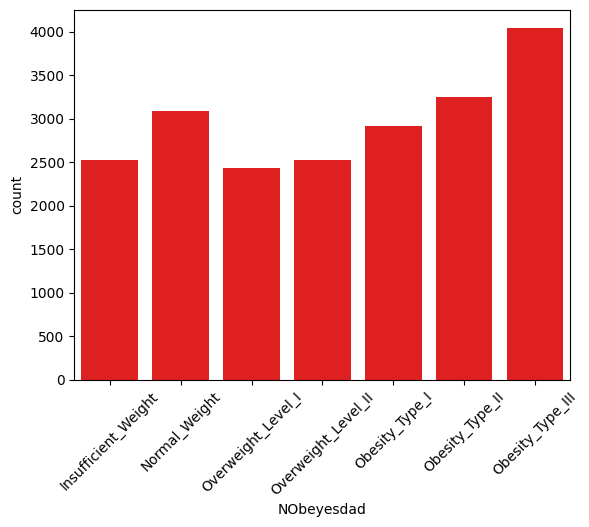

In [3]:
## distribution of obesity
g=sns.countplot(data=train, x='NObeyesdad', color='red')
plt.xticks(rotation=45)
None

### Categorical Variables
**Observations**
- Only females are more likely to be normal weight or less, but more likely to be obese
- Obesity 3 mainly exists in female sample, and Obesity 2 mainly exists for male sample
- Family history and FACV highly correlated with Obesity
- CAEC does not have linear relation with obesity - no CAEC corrlated with overweight 1, frequently correlated with insuff weight, always correlated with normal weight
- Smoke correlated with normal weight and obesity 2
- SCC very negatively correlated with obesity
- CALC correlated with overweight 1+
- MTRANS bike, motorbike and walking negatively correlated with obesity

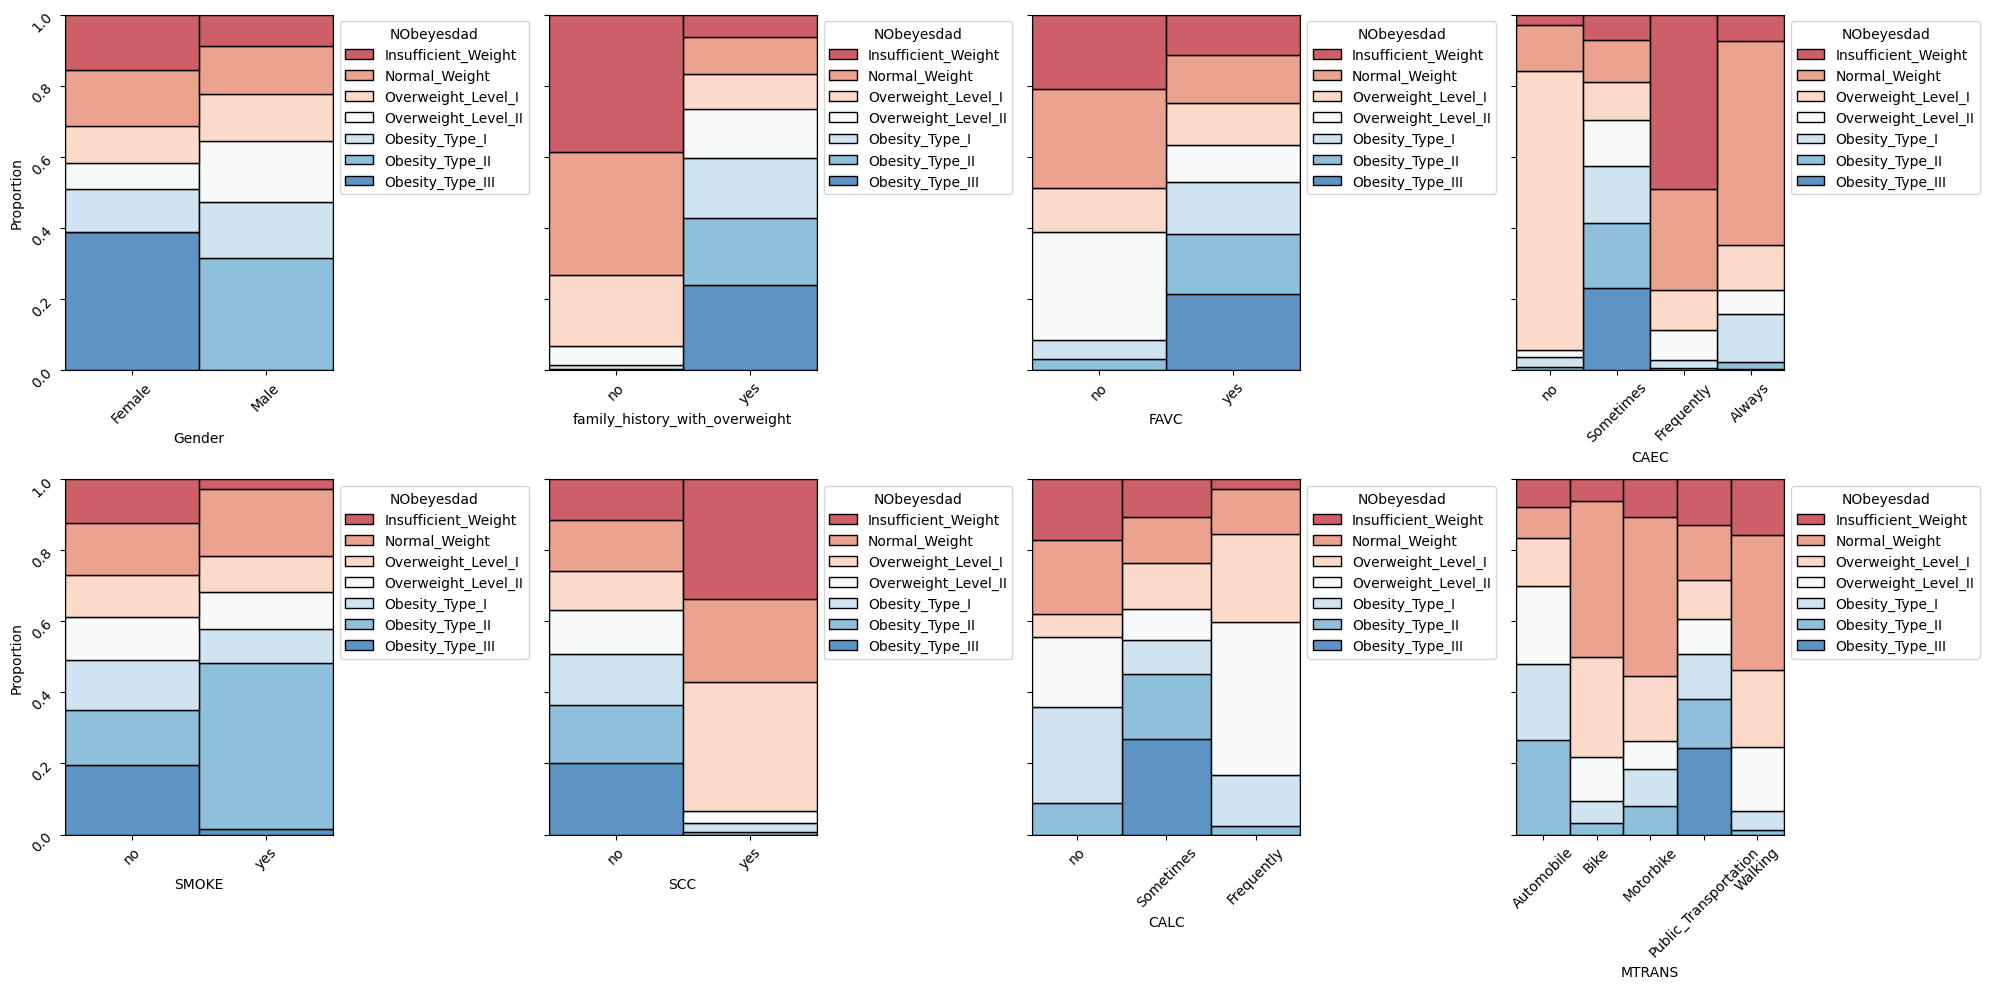

In [4]:
## list of all categorical variables
cols_cat = train.columns[train.dtypes=='category'].to_list()
cols_cat.remove('NObeyesdad')

## set up grid of subplots, then fill it with stacked frequency barplots of variable vs NObeyesdad
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,10), sharey=True)
for i, col in enumerate(cols_cat):
    ax = axes.ravel()[i]
    g=sns.histplot(data=train, ax=ax, x=col, hue='NObeyesdad', multiple='fill', stat='proportion', palette='RdBu')
    sns.move_legend(g, 'upper left', bbox_to_anchor=(1,1))
    ax.tick_params(rotation=45)
plt.tight_layout()

### Numerical Variables
**Observations**
* Apart from Age Height Weight, all variables have integers as the most common values
* Height and weight have a double peak, likely driven by male/female
* Combination of right and left skewed variables
* Slightly correlated with NObeyesdad:
    * Age, Height, CH20, FAF(neg corr)
* Strongly correlated with NObeyesdad: Weight
* 'U' shape correlation:
    * FCVC, NCP

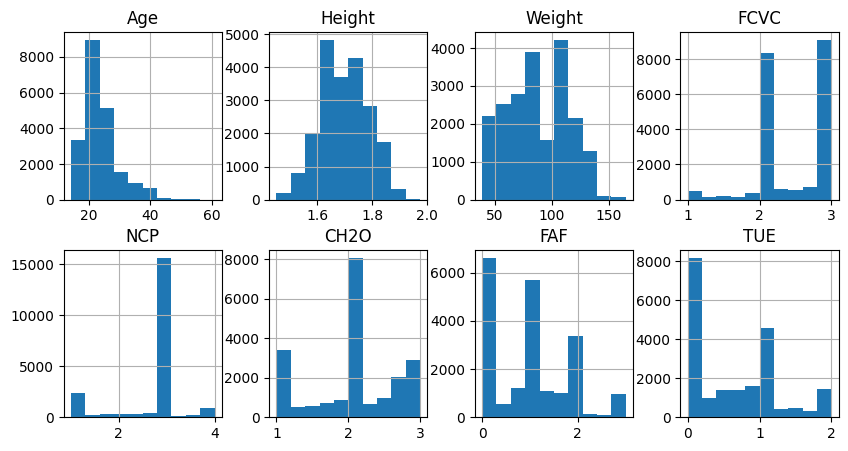

In [5]:
## histogram of all numerical variables
train.hist(figsize=(10,5), layout=(-1,4))
None

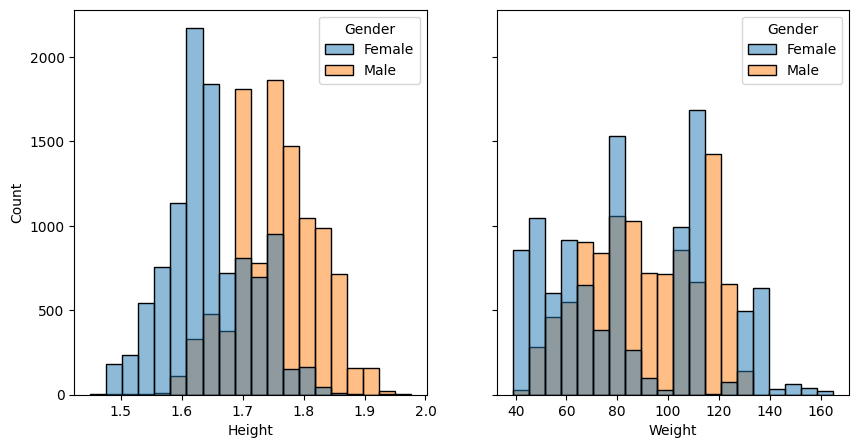

In [6]:
## split histogram by gender
fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(10,5), sharey=True)
for i, col in enumerate(['Height', 'Weight']):
    ax = axes.ravel()[i]
    sns.histplot(data=train, ax=ax,  x=col, hue='Gender', bins=20)

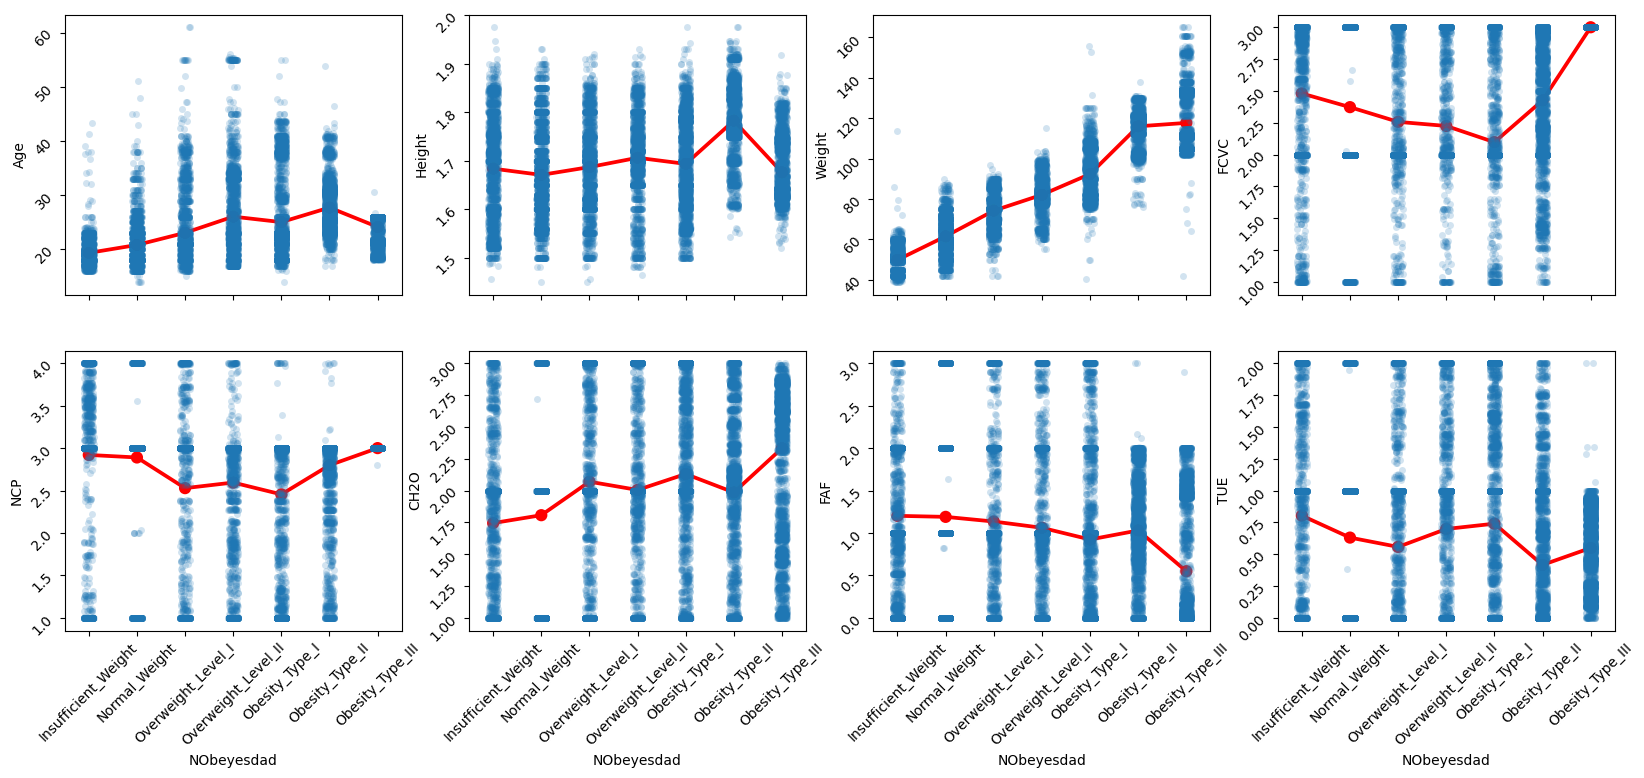

In [7]:
## list all numerical variables
cols_num = train.columns[train.dtypes!='category']

## set up grid of subplots, then fill with pointplots
fig, axes = plt.subplots(ncols=4, nrows=2, figsize=(20,8), sharex=True)
for i, col in enumerate(cols_num):
    ax = axes.ravel()[i]
    sns.stripplot(data=train, x='NObeyesdad', y=col, ax=ax, alpha=0.2)
    sns.pointplot(data=train, x='NObeyesdad', y=col, ax=ax, estimator='mean', errorbar=('se',2), color='red')
    ax.tick_params(labelrotation=45)

## Bivariate (Two-way) Analysis

### Categorical Variables

#### Cramer's V Matrix
**Observations**
- Categorical variables aren't very correlated

<Axes: >

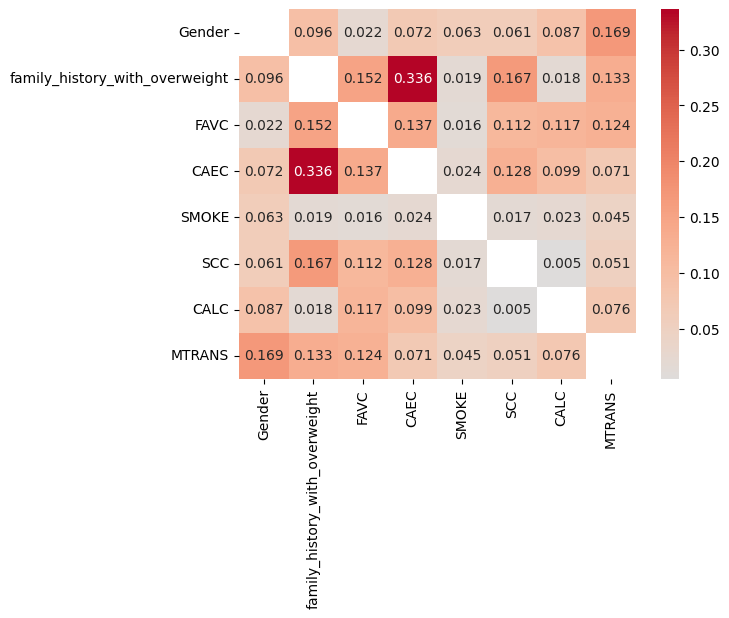

In [8]:
### create cramers_V calculation function
def cramers_V(data, var1, var2):
    cont_tbl = pd.crosstab(data[var1], data[var2])
    X2 = stats.chi2_contingency(cont_tbl, correction=False)[0]
    n = data.shape[0]
    min_dim = min(cont_tbl.shape)-1
    return( np.sqrt((X2/n)/min_dim) )

### create cramers_V association matrix and fill in
crmV_matrix = pd.DataFrame(data=0, index=cols_cat, columns=cols_cat, dtype=float)

for i, var1 in enumerate(cols_cat):
    for j, var2 in enumerate(cols_cat):
        crV = cramers_V(train,var1,var2)
        crmV_matrix.iat[i,j] = np.around(crV,3)

# Create S/M/W annotations for correlation matrix
crmV_annot = np.where((crmV_matrix)>0.6, "S", np.where((crmV_matrix)>0.2, "M", ""))

### create heatmap of cramers V association
sns.heatmap(data=crmV_matrix, center=0, cmap='coolwarm', mask=np.eye(len(crmV_matrix)), annot=crmV_matrix, fmt='', xticklabels=True, yticklabels=True)

### Numerical Variables

####  Correlation Matrix
**Observations**
- Numerical variables are very correlated
- Strongest correlation is between height and weight, which is intuitive

<Axes: >

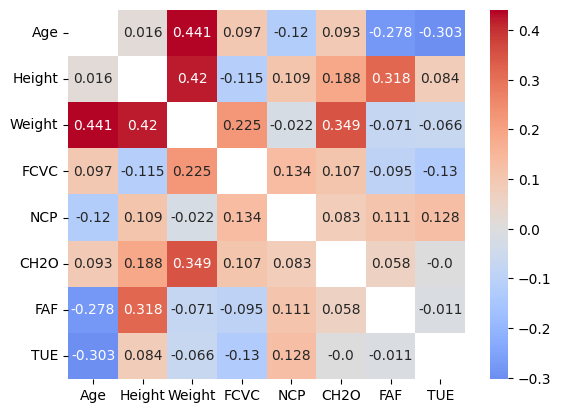

In [9]:
### create correlation matrix
corr_matrix = train[cols_num].corr(method='spearman')
corr_matrix = np.around(corr_matrix, 3)

# Create S/M/W annotations for correlation matrix
corr_annot = np.where(np.abs(corr_matrix)>0.70, "S", np.where(np.abs(corr_matrix)>0.5, "M", np.where(np.abs(corr_matrix)>0.25, "W", "")))

### create heatmap of correlations
sns.heatmap(data=corr_matrix, center=0, cmap='coolwarm', mask=np.eye(len(corr_matrix)), annot=corr_matrix, fmt='', xticklabels=True, yticklabels=True)